##**1. Importing the dataset and the necessary libraries, checking datatype, statistical summary, shape, null values etc.** 

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [8]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [9]:
import io
car = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [10]:
car.head(5)      

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
car.tail(5)                       

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [13]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## 2. Dropping columns that are not are not significant


I am dropping the Market Category column because it has very high number (3742) of null values and removing the null values would result in reduction of data significantly and some other columns.

In [14]:
car = car.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
car.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## 3. Renaming the columns

In [15]:
car = car.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
car.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4. Removing missing data and null values and duplicates in the dataset**

In [16]:
car.shape

(11914, 13)

In [17]:
dup_car = car[car.duplicated()]
print(dup_car.shape)

(792, 13)


dropping the duplicates

In [18]:
car = car.drop_duplicates()
car.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [19]:
car.shape

(11122, 13)

# **4. Removing missing data and null values in the dataset**

In [20]:
print(car.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


dropping the missing values

In [21]:
car = car.dropna()
car.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [22]:
print(car.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5. Plotting graphs of various columns to check for outliers**

In [23]:
plt.rcParams["figure.figsize"] = (11,7)  

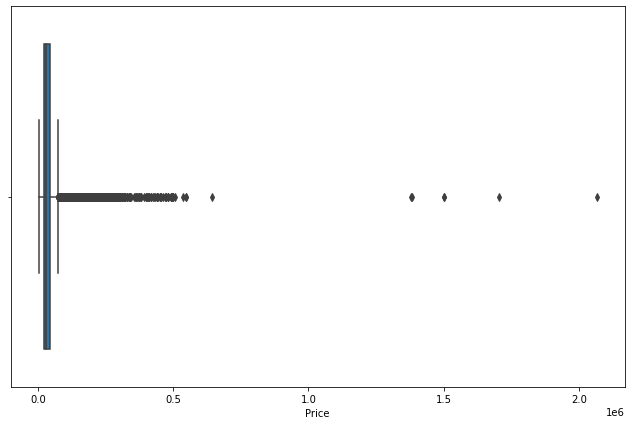

In [24]:
sns.boxplot(x=car['Price'])

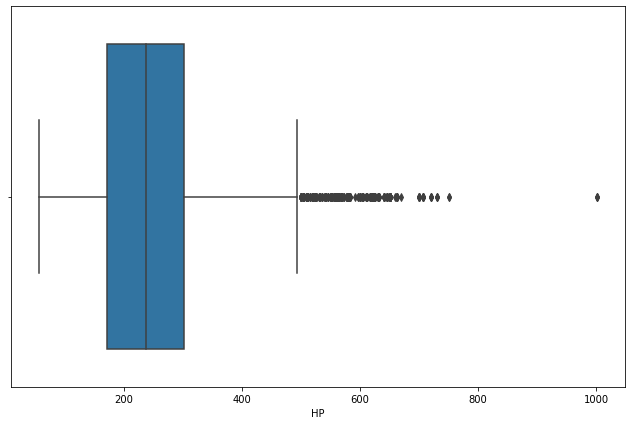

In [25]:
sns.boxplot(x=car['HP'])

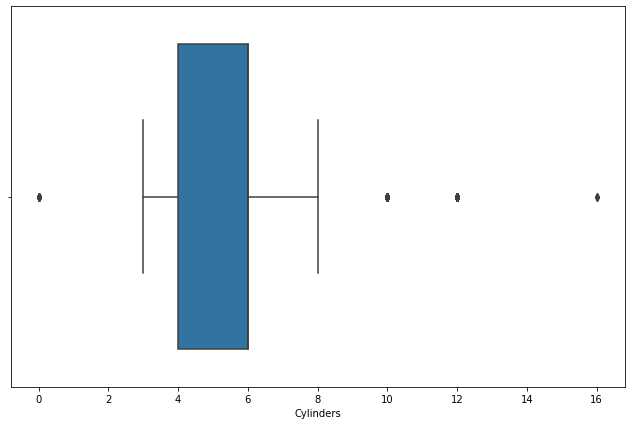

In [26]:
sns.boxplot(x=car['Cylinders'])

Using inter quartile range for outlier detection and elimination

In [27]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [28]:
car = car[~((car < (Q1 - 1.5 * IQR)) |(car > (Q3 + 1.5 * IQR))).any(axis=1)]
car.shape

(8546, 13)

# **6. car brands are the most represented in the dataset and finding the average price among the top car brands**

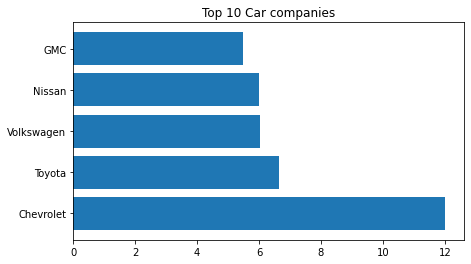

In [68]:
counts = car['Make'].value_counts()*100/sum(car['Make'].value_counts())
rep_cars = counts.index[:5]
    
plt.figure(figsize=(7,4))
plt.barh(rep_cars, width=counts[:5])
plt.title('Top 10 Car companies')
plt.show()

their average prices for each company

In [67]:
prices = car[['Make','Price']].loc[(car['Make'] == 'Chevrolet')|
               (car['Make'] == 'Volkswagen')|
               (car['Make'] == 'Toyota')|
               (car['Make'] == 'Nissan')|
               (car['Make'] == 'GMC')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
GMC         33261.400853
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# **7. The correlation matrix and insights**

In [31]:
car.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


##High correlation between


- Cylinders & HP
- highway mpg & City mpg


The more cylinders there are, the more powerful the car is

##High anticorrelation

- Cylinders & highway mpg

### **there is a positive correlation between:**

HP and Cylinders

HP and Price

Cylinders and Price

# 8.Exploratory Data Analysis and plots of different graphs and findings

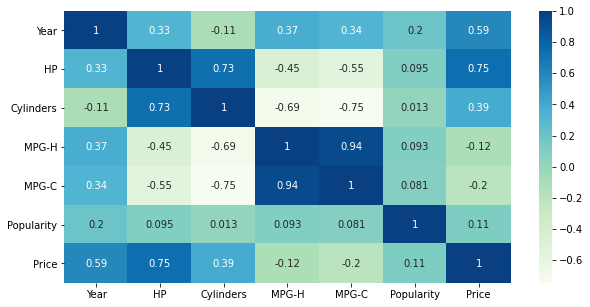

In [73]:
plt.figure(figsize=(10,5))
c= car.corr()
sns.heatmap(c,cmap="GnBu",annot=True)

Plotting the independent and dependent variables in a scatter plot

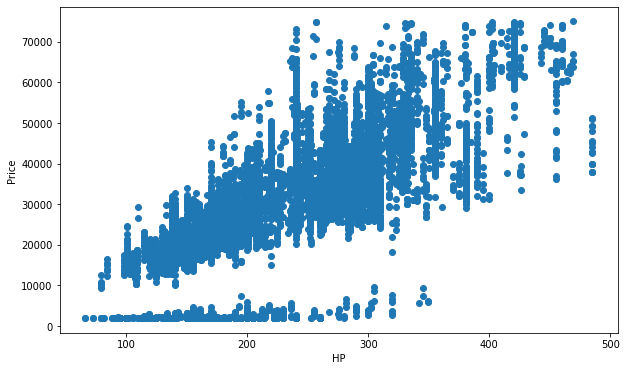

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(car['HP'], car['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Car types that were sold the most 

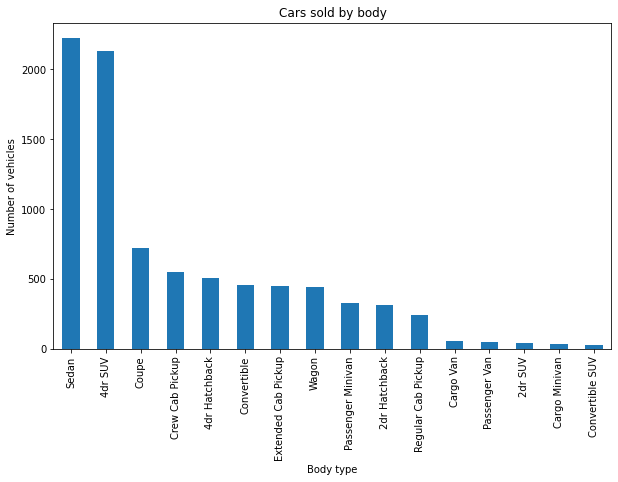

In [34]:
car['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

from the chart we can see that **Sedan** cars were the most sold cars 

Text(0.5, 0, 'Vehicle Count')

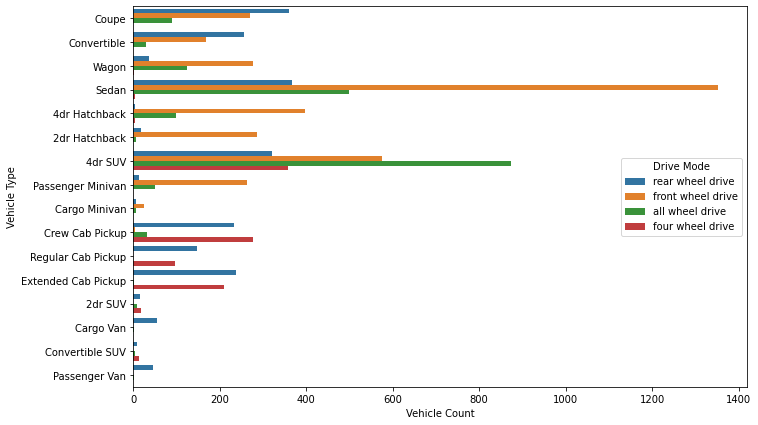

In [74]:
sns.countplot(y='Vehicle Style',data=car, hue='Drive Mode')
plt.ylabel('Vehicle Type')
plt.xlabel('Vehicle Count')


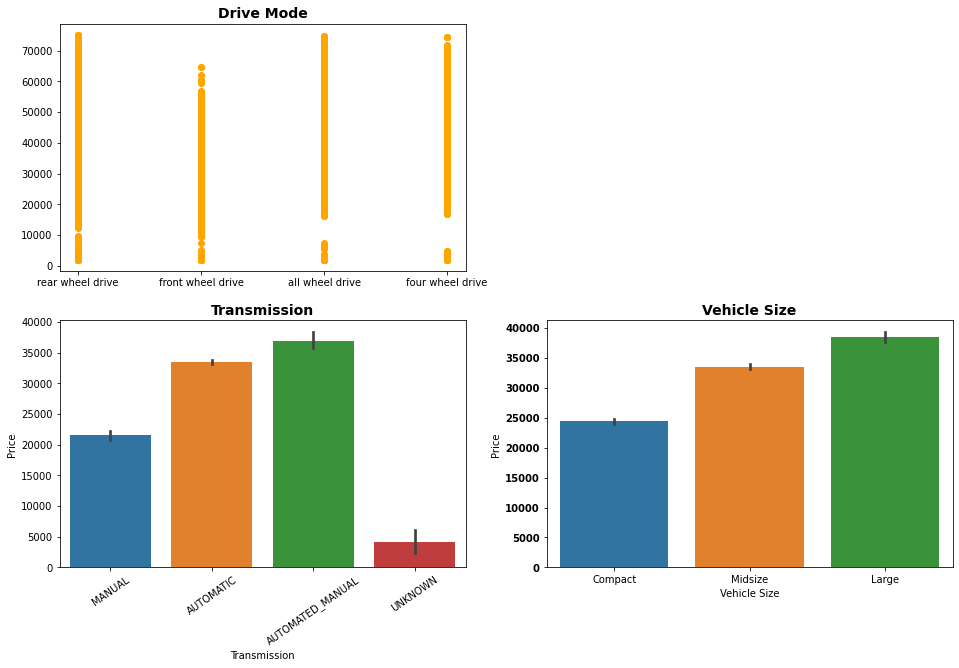

In [77]:

fig= plt.figure(figsize=(16,10))


ax1 = plt.subplot2grid((2,2), (0, 0))
plt.scatter(x=car['Drive Mode'], y=car['Price'], color='Orange')
plt.title('Drive Mode', weight='bold', fontsize=14)



ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=car['Transmission'], y=car['Price'])
plt.xticks(rotation=35)
plt.title('Transmission', weight='bold', fontsize=14)


ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(x=car['Vehicle Size'], y=car['Price'])

plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)


plt.show()

(array([10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 8 Text major ticklabel objects>)

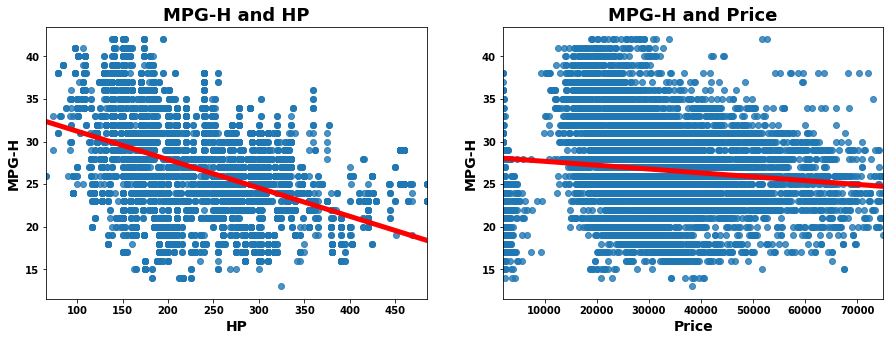

In [80]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=car["HP"], y=car["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car["Price"], y=car["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

From the plots above, we can see a negative correlation between highway and city mpg ( how far the car is able to travel for every gallon of fuel it uses in the highway and around the city) and the Engine HP. 


Horsepower is a measure of **work** that can be performed over a given **time** by an engine. The more power you have the higher the speed you can do it at during **a period of time**. Generally, **higher horsepower** comes from burning more fuel, so get **lower mpg**, more horsepower means less fuel economy.

 

What contribute to a High Price :

      - Number of doors : Cars with 2 doors 
      - Drive Mode : All wheel drive      
      - Transmission: Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)        
      - Vehicle Size: Large  

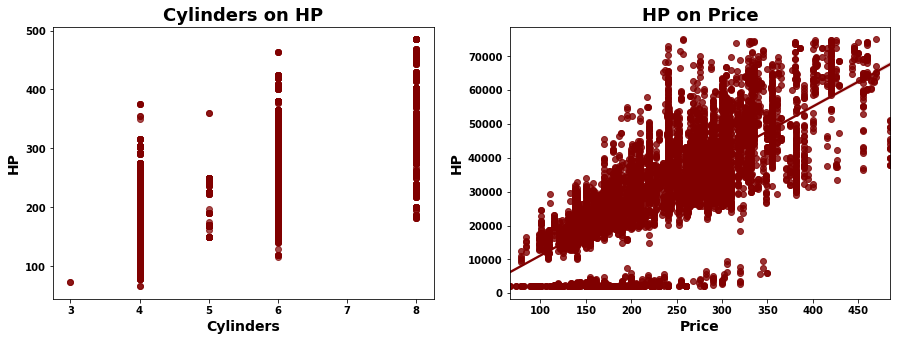

In [81]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=car['Cylinders'], y=car['HP'], color='maroon', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')



ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car['HP'], y=car['Price'], color='maroon')
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

  An engine with more cylinders produces more power, and more power means a high Price.

## 9. Spliting the dataset into 80 and 20 ratio and build a machine learning model with **Price** as the target variable

In [38]:
X = car[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = car['Price'].values

using standard scalar for machine learning model

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

Splitting the dataset into the Training and Test in the ratio of 80 and 20

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Multiple Linear Regression to the Training set

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions

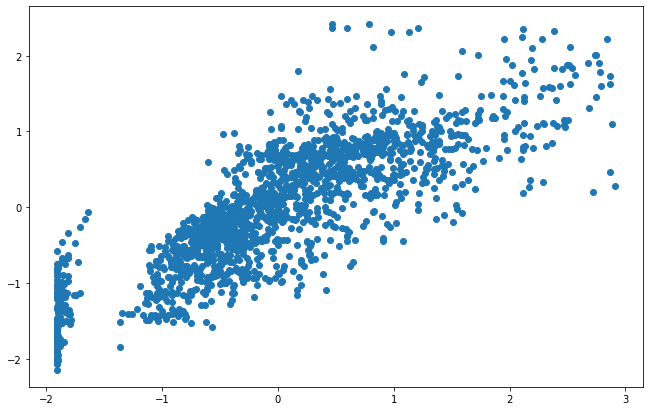

In [42]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# 10 Trying different algorithms and check their performance over metrics like     Rsquare, RMSE, MAE etc and document your findings

Using polynomial regression

In [45]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

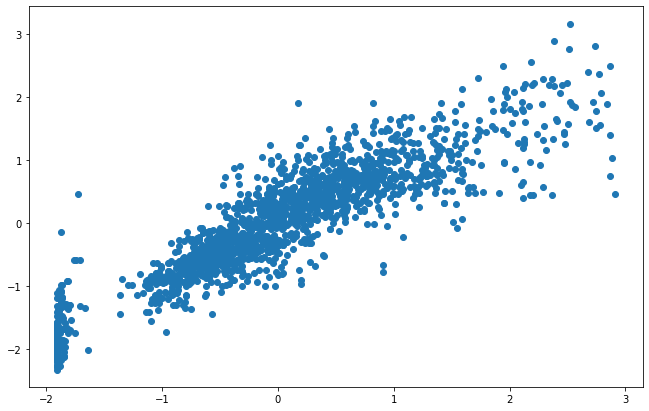

In [46]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

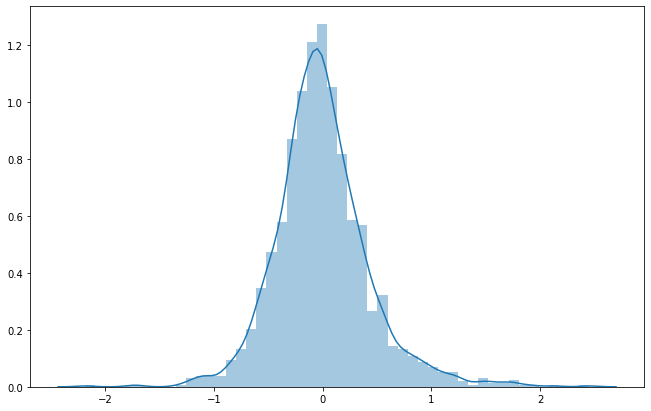

In [47]:
sns.distplot((y_test-y_pred),bins=50)

In [83]:
print('Mean Abs Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Sq Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Abs Error: 0.17769704010247667
Root Mean Sq Error: 0.24743996001244517
R squared: 0.9370492959370332


In [49]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predictions

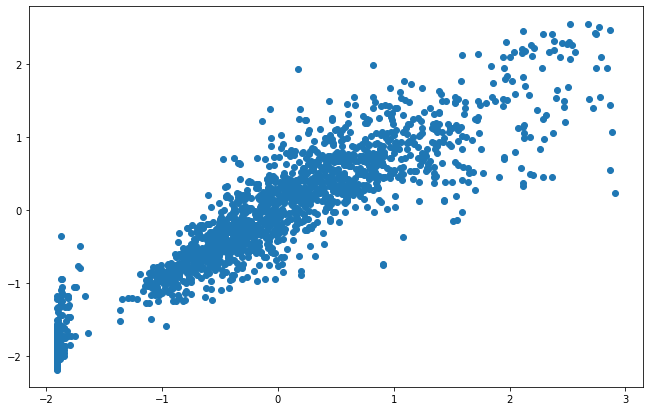

In [50]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

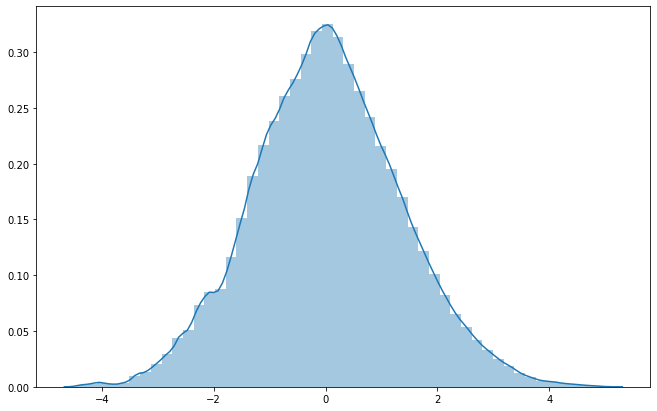

In [51]:
sns.distplot((y_test-y_pred),bins=50)

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


Using Random Forest

In [84]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

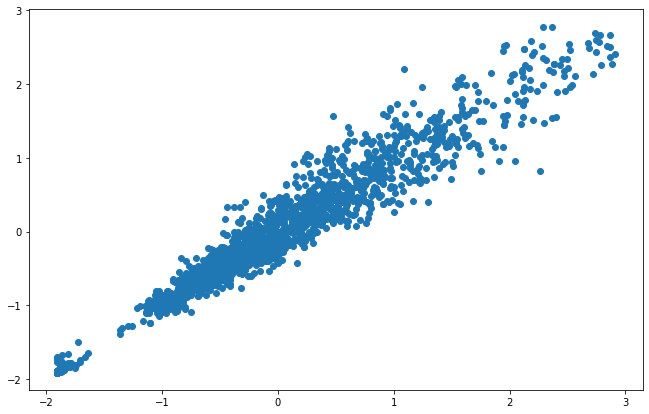

In [54]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

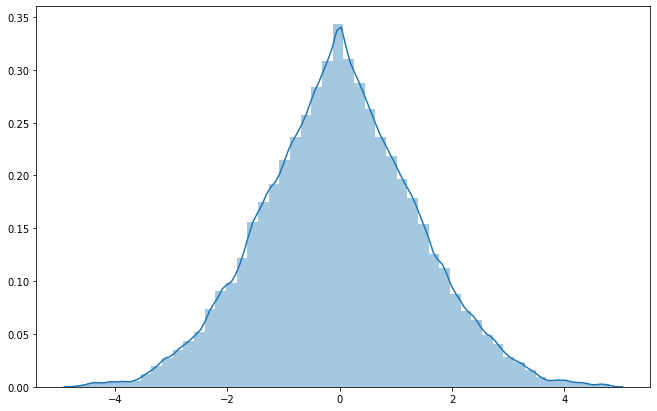

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332


# **Thank You** 

---

